In this assignment, students will be using the K-nearest neighbors
algorithm to predict how many points NBA players scored in the 2013-2014
season.

In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn import utils
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import pickle

In [24]:
#sheet = pd.read_csv('nba_2013.csv')
with open("nba_2013.csv",'r') as csvfile:
    data = pd.read_csv(csvfile)

In [25]:
data.head(5)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [26]:
data.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [27]:
data.dtypes

player           object
pos              object
age               int64
bref_team_id     object
g                 int64
gs                int64
mp                int64
fg                int64
fga               int64
fg.             float64
x3p               int64
x3pa              int64
x3p.            float64
x2p               int64
x2pa              int64
x2p.            float64
efg.            float64
ft                int64
fta               int64
ft.             float64
orb               int64
drb               int64
trb               int64
ast               int64
stl               int64
blk               int64
tov               int64
pf                int64
pts               int64
season           object
season_end        int64
dtype: object

In [66]:
data['x3p.'] = data['x3p.'].fillna(data['x3p.'].mean())
data['ft.'] = data['ft.'].fillna(data['ft.'].mean())
data['fg.'] = data['fg.'].fillna(data['fg.'].mean())
data['x2p.'] = data['x2p.'].fillna(data['x2p.'].mean())
data['efg.'] = data['efg.'].fillna(data['efg.'].mean())

In [67]:
data.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098467,50.855639,132.751732,0.146218,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.401000,0.000000,3.000000,0.262626,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.437000,16.000000,48.000000,0.314607,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479000,68.000000,193.000000,0.366460,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           481 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          481 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          481 non-null    float64
 16  efg.          481 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

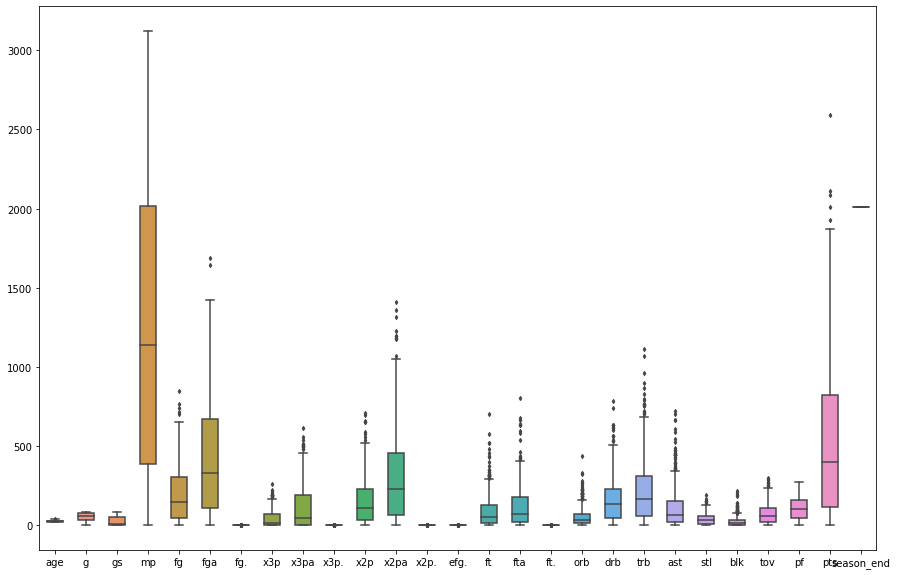

In [79]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

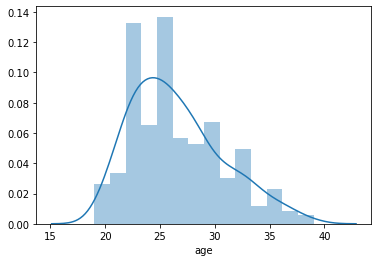

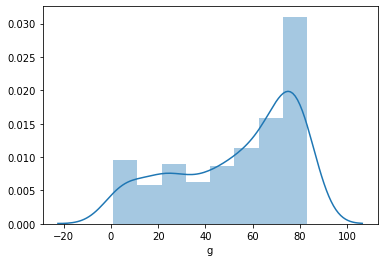

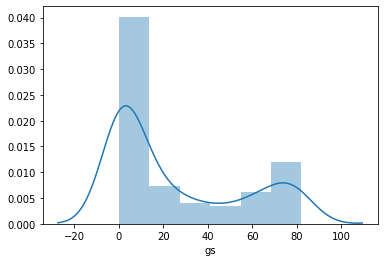

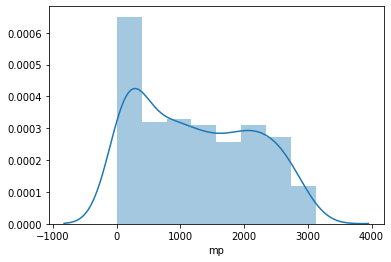

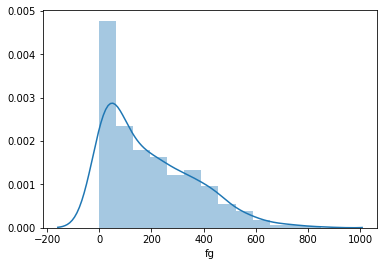

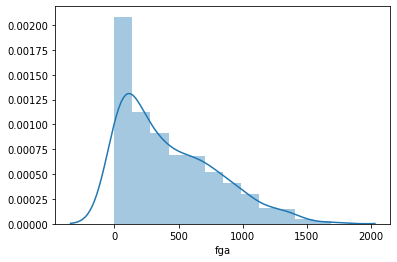

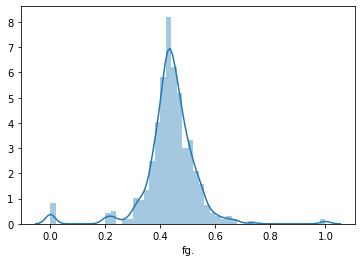

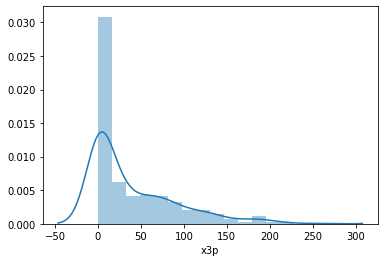

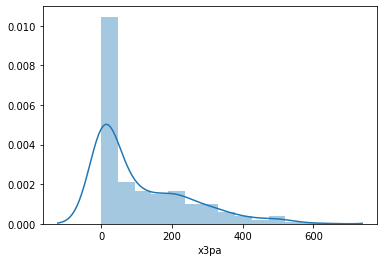

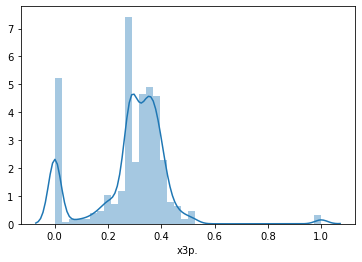

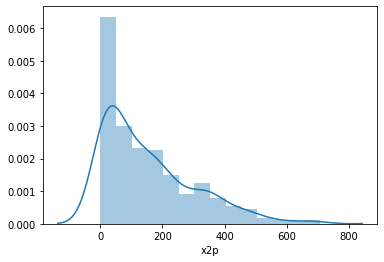

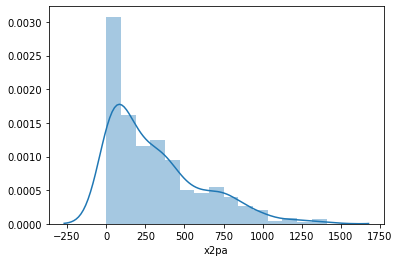

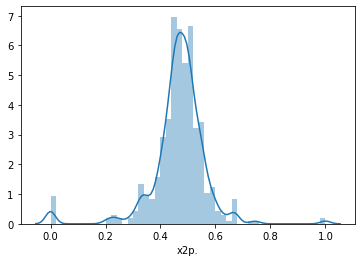

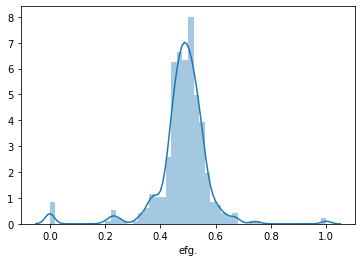

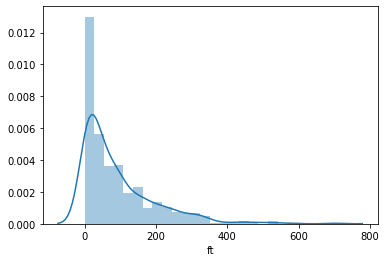

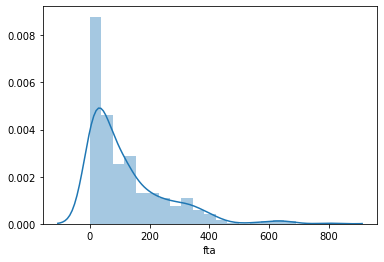

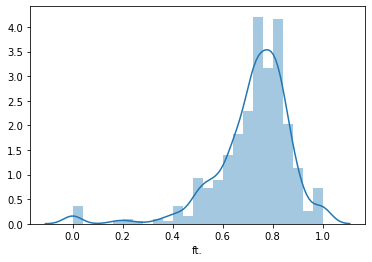

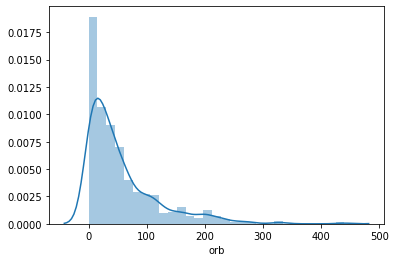

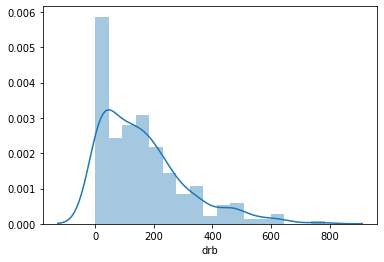

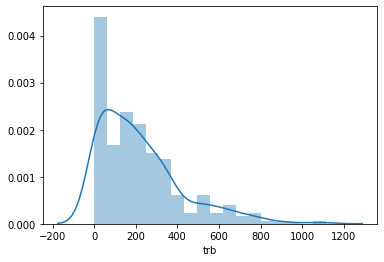

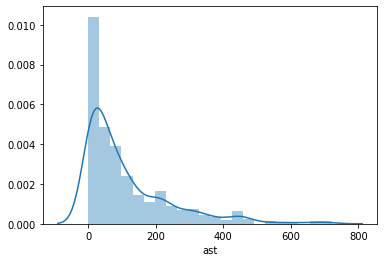

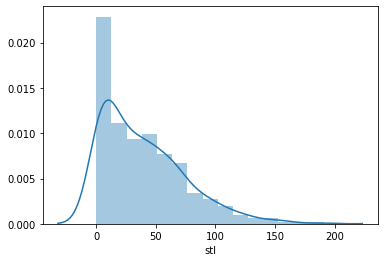

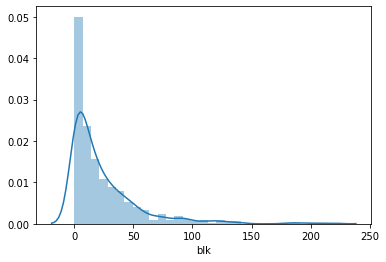

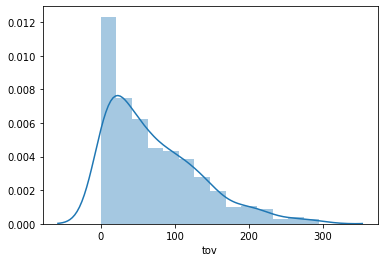

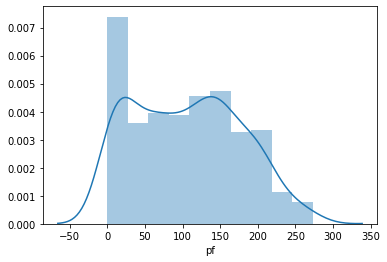

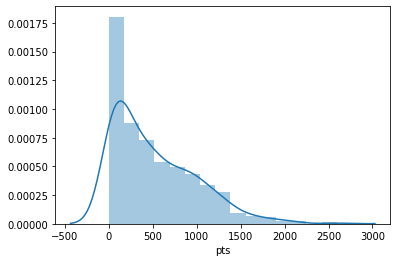

C:\Users\ranjan\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


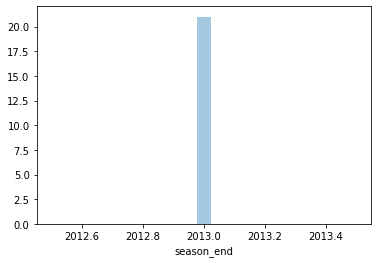

In [104]:
# let's see how data is distributed for every column
data1= data.drop(columns=['player','pos','season','bref_team_id'])

for column in data1:
    sns.distplot(data[column])
    plt.show()

In [68]:
a=data.dtypes[data.dtypes == "object"].index
dummies= pd.get_dummies(data,columns=['player','pos','bref_team_id','season'],dtype=int)

In [74]:
training= dummies.drop(columns=['pts'])
target=data['pts']

In [75]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(training)

In [131]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,target,test_size=0.2,random_state=100,shuffle=True)
knn =KNeighborsRegressor() 
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [132]:
print(knn.score(x_train,y_train))
print(knn.score(x_test,y_test))
y_predict = knn.predict(x_test)

0.8439795101856186
0.8244236107831484


In [113]:
#k-fold cross validation 
from sklearn.model_selection import KFold
kfold = KFold(n_splits=12,random_state= 42)
kfold.get_n_splits(x_scaled)

C:\Users\ranjan\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


12

In [119]:
from statistics import mean
knn1 = KNeighborsRegressor(algorithm ='auto', leaf_size =18, n_neighbors =11)
cnt =0
count=[]
train_score =[]
test_score = []

for train_index,test_index in kfold.split(x_scaled):
    X_train, X_test = x_scaled[train_index], x_scaled[test_index] # our scaled data is an array so it can work on x[value]
    Y_train, Y_test = target.iloc[train_index], target.iloc[test_index] # y is a dataframe so we have to use "iloc" to retreive data
    knn1.fit(X_train,Y_train)
    train_score_ = knn.score(X_train,Y_train)
    test_score_ =  knn.score(X_test,Y_test)
    cnt+=1
    count.append(cnt)
    train_score.append(train_score_)
    test_score.append(test_score_)
    
    print("for k = ", cnt)
    print("train_score is :  ", train_score_, "and test score is :  ", test_score_)
print("************************************************")
print("************************************************")
print("Average train score is :  ", mean(train_score))
print("Average test score is :  ", mean(test_score))

for k =  1
train_score is :   0.8381730573581709 and test score is :   0.8749416696782106
for k =  2
train_score is :   0.8413360886634835 and test score is :   0.8315753982225761
for k =  3
train_score is :   0.8389364008709423 and test score is :   0.8602779576496256
for k =  4
train_score is :   0.8344440969203261 and test score is :   0.87361007500649
for k =  5
train_score is :   0.8388614093771922 and test score is :   0.8542605098370669
for k =  6
train_score is :   0.8434310630736427 and test score is :   0.8160211307543588
for k =  7
train_score is :   0.8436510117446823 and test score is :   0.8135153432128455
for k =  8
train_score is :   0.8421398005218108 and test score is :   0.8223784746683531
for k =  9
train_score is :   0.8383670589782851 and test score is :   0.8652663527134702
for k =  10
train_score is :   0.8419786083408968 and test score is :   0.7849331032498873
for k =  11
train_score is :   0.8450721354451356 and test score is :   0.7909018601322657
for k =  1

In [133]:
#saving the model to the local file system
sample=training.iloc[1:2]
filename = "final_KNN.pickle"
pickle.dump(knn, open(filename,'wb'))

In [134]:
load_model = pickle.load(open(filename,'rb'))
a=load_model.predict(scaler.transform(sample))
print(" NBA player point predicted value of input ")
print(a)

 NBA player point predicted value of input 
[285.]


In [ ]:
                          # thank you sir